# Fall Detection for Elderly Wearable Tech

Falls are one of the leading causes of injury in elderly populations. Detecting falls in real time can greatly shorten response time and minimise long-term damage. This research intends to create a fall detection model based on data from wearable sensors (accelerometers and gyroscopes) that are part of an ageing monitoring system. The model will classify falls using sensor data, giving a dependable solution for real-world use.

The major purpose of this project is to develop a deep learning model that can accurately distinguish between falls and non-falls. The model tries to increase prediction accuracy by using time-series data from accelerometers and gyroscopes while addressing issues such as data imbalance and noise.

### Data Collection and Preparation
####  Data Sources
The dataset used in this project consists of time-series data collected from wearable devices, specifically accelerometer and gyroscope sensors. The sensors operate at a frequency of 50Hz, capturing detailed motion data. The data contains multiple fall scenarios along with routine movements, which helps in training the model to recognize fall patterns.
#### Data Merging and Cleaning
To combine the accelerometer and gyroscope data, the datasets were merged on the timestamp for each activity. Gyroscope time lists were discarded to avoid redundancy, and missing values were carefully handled by removing NaNs, ensuring data integrity for the model.

In [15]:
import os
import pandas as pd
import numpy as np


# Function to merge accel and gyro data
def merge_data(accel_file, gyro_file):
    accel_data = pd.read_csv(accel_file)
    gyro_data = pd.read_csv(gyro_file)
    merged_data = pd.concat([accel_data, gyro_data.drop(columns=['gyro_time_list'])], axis=1)  # drop gyro_time_list
    return merged_data

# Function to label the merged data based on timestamps
def apply_labels(merged_data, filename, fall_timestamps):
    # Filter rows for the current filename
    file_timestamps = fall_timestamps[fall_timestamps['filename'] == filename]

    # Initialize the labels column with 0
    merged_data['labels'] = 0

    # Loop through each timestamp entry for this file
    for _, row in file_timestamps.iterrows():
        start_time = row['start_time']
        end_time = row['end_time']

        # Assign label 1 if accel_time_list falls within the start_time and end_time
        merged_data.loc[(merged_data['accel_time_list'] >= start_time) & (merged_data['accel_time_list'] <= end_time), 'labels'] = 1

    return merged_data

# Load the fall timestamps data
fall_timestamps_path = '/Users/rhythmnarula/Desktop/WEDA-FALL-main/dataset/fall_timestamps.csv'
fall_timestamps = pd.read_csv(fall_timestamps_path)

# Base directory containing F01, F02, ... folders
base_dir = '/Users/rhythmnarula/Desktop/WEDA-FALL-main/dataset/50hz/'

# Prepare to store all merged data with user and fall information
all_data = []

# Iterate over F01, F02, ..., F08 folders only
for folder in os.listdir(base_dir):
    if folder.startswith('F'):  # Ensure we are working only on F folders (fall types)
        folder_path = os.path.join(base_dir, folder)

        # Extract the fall type from the folder name (e.g., F01)
        fall_type = folder

        # Iterate over the files in each folder
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                if 'accel.csv' in file:
                    # Identify corresponding gyro file
                    gyro_file = file.replace('accel.csv', 'gyro.csv')
                    
                    accel_file_path = os.path.join(root, file)
                    gyro_file_path = os.path.join(root, gyro_file)
                    
                    if os.path.exists(gyro_file_path):
                        # Merge accel and gyro data
                        merged_data = merge_data(accel_file_path, gyro_file_path)
                        
                        # Get the filename format used in the fall_timestamps file (e.g., F01/U01_R01)
                        filename = f"{folder}/{file.replace('_accel.csv', '')}"
                        
                        # Extract user ID (e.g., U01) from the file name
                        user_id = file.split('_')[0]

                        # Apply labels to the merged data based on the timestamps
                        merged_data = apply_labels(merged_data, filename, fall_timestamps)
                        
                        # Add user and fall type columns to the merged data
                        merged_data['user_id'] = user_id
                        merged_data['fall_type'] = fall_type
                        
                        # Append the merged data to the all_data list
                        all_data.append(merged_data)

                        # Optionally, remove the original files after merging
                        os.remove(accel_file_path)
                        os.remove(gyro_file_path)

print("All files merged and labeled successfully.")

# Step 2: Combine all merged data into one final dataset
final_merged_data = pd.concat(all_data, axis=0)

# Save the final merged dataset to a CSV file
final_output_path = '/Users/rhythmnarula/Desktop/WEDA-FALL-main/final_merged_dataset_with_users_fall.csv'
final_merged_data.to_csv(final_output_path, index=False)
print("Final merged dataset saved with user and fall type information.")

All files merged and labeled successfully.
Final merged dataset saved with user and fall type information.


### Reshaping 

Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5075 - loss: 1.5011 - val_accuracy: 0.4082 - val_loss: 0.8569 - learning_rate: 1.0000e-05
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5187 - loss: 1.4642 - val_accuracy: 0.3878 - val_loss: 0.8350 - learning_rate: 1.0000e-05
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4893 - loss: 1.3652 - val_accuracy: 0.4694 - val_loss: 0.8258 - learning_rate: 1.0000e-05
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5189 - loss: 1.2269 - val_accuracy: 0.4490 - val_loss: 0.8234 - learning_rate: 1.0000e-05
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5413 - loss: 1.2918 - val_accuracy: 0.4694 - val_loss: 0.8254 - learning_rate: 1.0000e-05
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5420 - loss: 1.2866 - val_accuracy: 0.4898 - val_loss: 0.8313 - learning_rate: 1.0000e-05


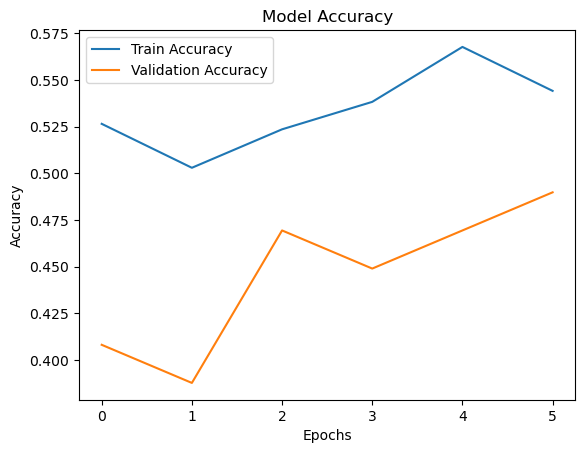

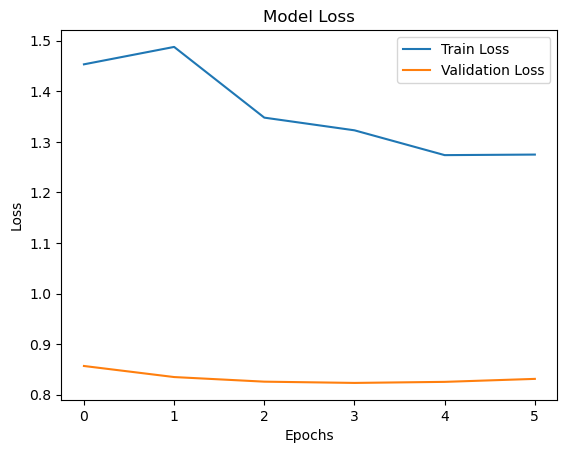

In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from imblearn.combine import SMOTETomek
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LeakyReLU
import matplotlib.pyplot as plt
import tensorflow as tf

# Load and preprocess data
final_merged_dataset_path = '/Users/rhythmnarula/desktop/WEDA-FALL-main/final_merged_dataset_with_users_fall.csv'
final_merged_dataset = pd.read_csv(final_merged_dataset_path)

TIME_STEPS = 500
FEATURES = 6

sensor_data = final_merged_dataset[['accel_x_list', 'accel_y_list', 'accel_z_list', 'gyro_x_list', 'gyro_y_list', 'gyro_z_list']].values
labels = final_merged_dataset['labels'].values

def reshape_for_cnn(data, time_steps):
    num_samples = len(data) // time_steps
    data = data[:num_samples * time_steps]
    return data.reshape(num_samples, time_steps, FEATURES)

X = reshape_for_cnn(sensor_data, TIME_STEPS)
y = labels[:X.shape[0]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

X_train_scaled_clean = X_train_scaled[~np.isnan(X_train_scaled).any(axis=(1, 2))]
y_train_clean = y_train[~np.isnan(X_train_scaled).any(axis=(1, 2))]

X_test_scaled_clean = X_test_scaled[~np.isnan(X_test_scaled).any(axis=(1, 2))]
y_test_clean = y_test[~np.isnan(X_test_scaled).any(axis=(1, 2))]

y_train_clean = np.where(y_train_clean > 0, 1, 0)
y_test_clean = np.where(y_test_clean > 0, 1, 0)

class_weights = compute_class_weight('balanced', classes=np.unique(y_train_clean), y=y_train_clean.flatten())
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

X_train_flattened = X_train_scaled_clean.reshape(X_train_scaled_clean.shape[0], -1)

# Use SMOTETomek for data balancing
smote_tomek = SMOTETomek()
X_train_balanced_flat, y_train_balanced = smote_tomek.fit_resample(X_train_flattened, y_train_clean)
X_train_balanced = X_train_balanced_flat.reshape(-1, TIME_STEPS, FEATURES)

# Model definition (Simplified model with reduced complexity)
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=3, input_shape=(TIME_STEPS, FEATURES), kernel_regularizer=regularizers.l2(0.001)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Conv1D(filters=32, kernel_size=3, kernel_regularizer=regularizers.l2(0.001)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # Reduced complexity
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile model with a lower learning rate and RMSprop optimizer
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
callbacks = [reduce_lr, early_stopping]

history = model.fit(X_train_balanced, y_train_balanced, epochs=50, batch_size=32,
                    validation_data=(X_test_scaled_clean, y_test_clean),
                    class_weight=class_weight_dict, callbacks=callbacks)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Feature Engineering
Time-Series Reshaping
Since the dataset consists of continuous time-series data, we divided the data into segments of 500-time steps (equivalent to 10 seconds) for feature extraction. This window size was intended to strike a compromise between detecting quick movements and recording long falls.

### Labeling
Falls were labeled based on the start and end timestamps provided in the dataset. Labels were assigned as binary values (0 for no fall, 1 for a fall).

In [28]:
import pandas as pd

# Load the final merged dataset with user and fall type information
final_merged_dataset_path = '/Users/rhythmnarula/Desktop/WEDA-FALL-main/final_merged_dataset_with_users_fall.csv'
final_merged_dataset = pd.read_csv(final_merged_dataset_path)

# Assuming your dataset has these columns for sensor data (accel and gyro values)
sensor_data = final_merged_dataset[['accel_x_list', 'accel_y_list', 'accel_z_list', 'gyro_x_list', 'gyro_y_list', 'gyro_z_list']].values

# Extract labels (assuming you have a 'labels' column for fall detection)
labels = final_merged_dataset['labels'].values

# Reshape sensor data and labels into the proper format for the CNN model
X = reshape_for_cnn(sensor_data, TIME_STEPS)
y = labels[:X.shape[0]]  # Ensure the labels have the same number of samples as X

# Now, you can split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_flattened)

# Apply SMOTETomek on the imputed data
smote_tomek = SMOTETomek()
X_train_balanced_flat, y_train_balanced = smote_tomek.fit_resample(X_train_imputed, y_train)

# Reshape the balanced data back to the original shape
X_train_balanced = X_train_balanced_flat.reshape(-1, TIME_STEPS, FEATURES)

print("Balanced data shape:", X_train_balanced.shape)


Balanced data shape: (456, 500, 6)


In [56]:
TIME_STEPS = 500
FEATURES = 6  # 6 features: accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z

def reshape_for_cnn(data, time_steps):
    num_samples = len(data) // time_steps
    data = data[:num_samples * time_steps]  # Ensure data is divisible by time steps
    return data.reshape(num_samples, time_steps, FEATURES)


In [58]:
# Assuming X and y are already defined as sensor data and labels
# Reshape sensor data and labels into proper format
X = reshape_for_cnn(sensor_data, TIME_STEPS)
y = labels[:X.shape[0]]

# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Convolutional neural networks (CNN)
Given the time-series nature of the data, a Convolutional Neural Network (CNN) was used for this project. CNNs are good at detecting spatial patterns in sequential data, which makes them perfect for spotting fall patterns from sensor measurements.

To avoid overfitting, the architecture contains numerous convolutional layers that use batch normalisation and dropout. Dropout layers are especially significant because of the inherent noise and volatility in real-world sensor data.

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Flatten, BatchNormalization

model = Sequential()

# First Convolutional Layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(TIME_STEPS, FEATURES)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.4))
model.add(BatchNormalization())

# Second Convolutional Layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.4))
model.add(BatchNormalization())

# Flatten the output
model.add(Flatten())

# Fully connected Dense Layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.6))

# Output Layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Handling Imbalanced Data
Given the imbalance in the dataset (more non-falls than falls), we used the SMOTETomek technique for balancing the data. Class weights were also calculated and applied during training.

In [64]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from imblearn.combine import SMOTETomek

# Compute class weights for handling imbalanced data
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train.flatten())
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Flatten X_train for SMOTETomek resampling (it expects 2D array)
X_train_flattened = X_train.reshape(X_train.shape[0], -1)

# Use SMOTETomek to balance the data
smote_tomek = SMOTETomek()
X_train_balanced_flat, y_train_balanced = smote_tomek.fit_resample(X_train_flattened, y_train)

# Reshape the balanced data back into its original format (samples, time_steps, features)
X_train_balanced = X_train_balanced_flat.reshape(-1, TIME_STEPS, FEATURES)

print("Balanced data shape:", X_train_balanced.shape)



ValueError: Input X contains NaN.
SMOTETomek does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

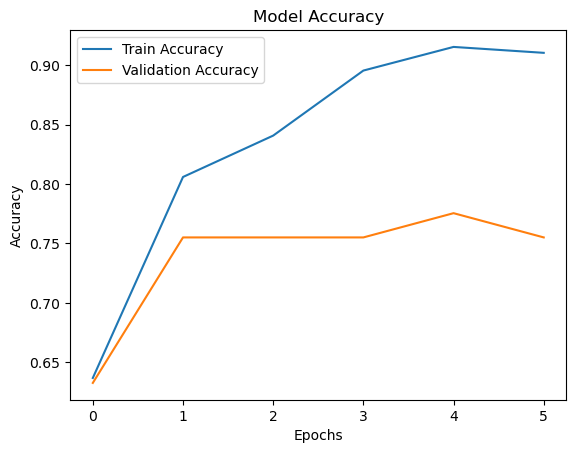

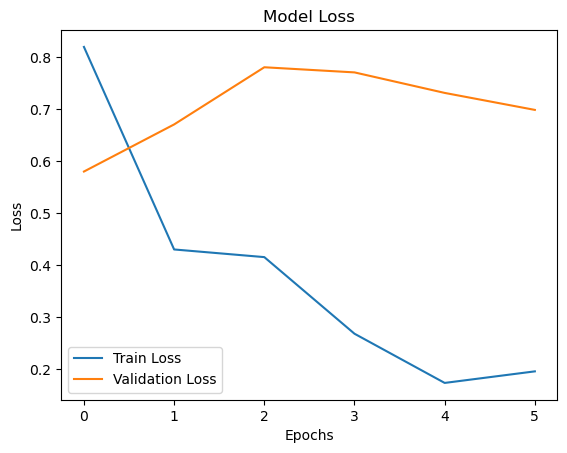

In [43]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Confusion Matrix
The confusion matrix provides insight into the true positives, true negatives, false positives, and false negatives, which are critical for understanding model performance in detecting falls.

In [1]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test_scaled_clean)
y_pred = (y_pred > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test_clean, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


NameError: name 'model' is not defined